Inteligencia Artificial II

Aldo Elio Peña Salas – 635861

Dr Andrés Hernández Gutiérrez

16 de febrero de 2026

San Pedro Garza García

## 1. Dataset Description and Exploratory Analysis

### Descripción del Dataset

En este trabajo se escogió un conjunto de datos de Wine Quality (White Whine) el cual contiene variables con las cuales se determina la calidad de un vino blanco. El dominio de esta aplicación es la industria alimentaria y la enología (la ciencia que estudia la producción del vino). Dentro de estas áreas, son estas variables las que funcionan como control de calidad del vino. El fin de este notebook será modelar la relación entre las variables de laboratorio y la calificación otorgada por expertos.

#### Variables Predictivas:

En este dataset todas las variables predictivas son numéricas:
- Fixed acidity: Ácidos fijos del vino (principalmente tartárico).
- Volatile acidity: Ácido acético (un exceso puede dar sabor a vinagre).
- Citric acid: Ácido cítrico, aporta frescura
- Residual sugar: Cantidad de azúcar restante tras la fermentación.
- Chlorides: Cantidad de sal en el vino.
- Free sulfur dioxide: Dióxido de azufre libre (previene el crecimiento microbiano y la oxidación).
- Total sulfur dioxide: Cantidad total de $SO_2$.
- Density: Densidad del vino (influenciada por el azúcar y el alcohol).
- pH: Describe qué tan ácido o básico es el vino (escala de 0 a 14).
- Sulphates: Aditivos que actúan como antimicrobianos.
- Alcohol: Porcentaje de contenido alcohólico.

#### Variable Target
La variable objetivo en este caso es quality. Es una variable de tipo entero. Su rango ronda de 0 (siendo muy malo) hasta 10 (excelente).

#### Importar los datos
En el siguiente bloque de código importaremos la libreria pandas para el manejo de estructura de datos. Se define la url de donde se descargaran los datos. Y dado que el archivo original usa punto y coma ; como delimitador, se especifica eso en el parámetro de la función read_csv.

In [2]:
import pandas as pd

# URL del dataset (White Wine)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Cargamos especificando el separador ';' que usa este archivo original de la UCI
df = pd.read_csv(url, sep=';')

print(f"Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas.")

Dataset cargado con 4898 filas y 12 columnas.


Ya cargados los datos con el mensaje de verificación de cuántas filas y columnas se cargaron es necesario verificar mostrar las primeras 5 filas para validar que la lectura fue correcta. De igual manera es necesario ver un resumen de las columnas para ver el tipo de datos con el que se esta trabajando.

In [3]:
# Mostrar las primeras 5 filas
print("Primeras filas del dataset:")
display(df.head())

# Resumen de tipos de datos y valores faltantes
print("\nResumen técnico del DataFrame:")
df.info()

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Resumen técnico del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


La inspección inicial muestra un dataset de 4,898 registros sin valores nulos, lo que garantiza la integridad de la información. Se identifican 11 variables predictoras numéricas (decimales) y una variable objetivo entera (quality). La diferencia de escalas observada entre variables como density y total sulfur dioxide sugiere que será necesario normalizar los datos antes de aplicar algoritmos como PCA.

### Limpiado de datos
Aunque este dataset es conocido por estar limpio, nunca esta de más verificar el estado de los datos con los que se trabajarán. Es buena práctica no asumir que los datos vienen perfectos.

#### Verificar valores nulos
Primero hay que confirmar que no existan celdas vacías en el dataset, ya que estos valores nulos pueden causar errores o sesgos.

In [4]:
# Verificación de valores nulos
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


La salida confirma que no existen valores faltantes en el dataset. Por lo tanto, no se requiere aplicar técnicas de imputación (como promedios) ni eliminar registros incompletos.

#### Verificar registros duplicados
Hay que confirmar que no haya registros duplicados ya que pueden llegar a sesgar también y llegar a causar overfitting. Entonces hay que identificar si hay duplicados y si es que hay borrarlos

In [5]:
# Conteo y eliminación de duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados detectados: {duplicados}")

df = df.drop_duplicates()
print(f"Dimensiones del dataset tras la limpieza: {df.shape}")

Registros duplicados detectados: 937
Dimensiones del dataset tras la limpieza: (3961, 12)


Se encontraron y eliminaron los registros duplicados. Esto ayuda porque si un mismo dato aparece varias veces, el modelo piensa que es más importante de lo que realmente es. Al dejar solo un ejemplo de cada caso, el modelo aprende de manera más equilibrada y los resultados son más justos y confiables.

#### Selección de Variables y Relevancia
En este caso, todas las variables son mediciones físico-químicas (pH, alcohol, densidad, etc.) con relevancia técnica comprobada en la calidad del vino. Por lo tanto, se conservan todas las variables predictoras originales, ya que ninguna se considera irrelevante para el objetivo de control de calidad.

### Exploratory Data Analysis
####Estadísticas Descriptivas
Antes de graficar, es necesario entender las medidas de tendencia central y dispersión de los datos. En la siguiente celda generamos un resumen estadístico (media, desviación estándar, mínimos y máximos) para todas las variables numéricas.

In [6]:
# Resumen estadístico descriptivo
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Diferencia de escalas: Variables como la densidad tienen valores muy pequeños, mientras que el dióxido de azufre llega hasta 440. Esto hace necesario normalizar los datos antes de procesarlos.

Calidad promedio: La mayoría de los vinos tienen una calificación de 5.85, situándose en un rango de calidad media.

Variedad de azúcar: Hay una gran diferencia entre los vinos de la muestra, encontrando desde vinos muy secos hasta muy dulces.


#### Análisis de la variable objetivo (quality)
Para entender cómo están clasificadas las calificaciones de los vinos, es importante ver cómo se distribuye la variable **quality**. Esto nos ayuda a saber si hay la misma cantidad de vinos en cada calificación o si hay muchas más en algunas que en otras, lo cual puede afectar cómo aprende el modelo.


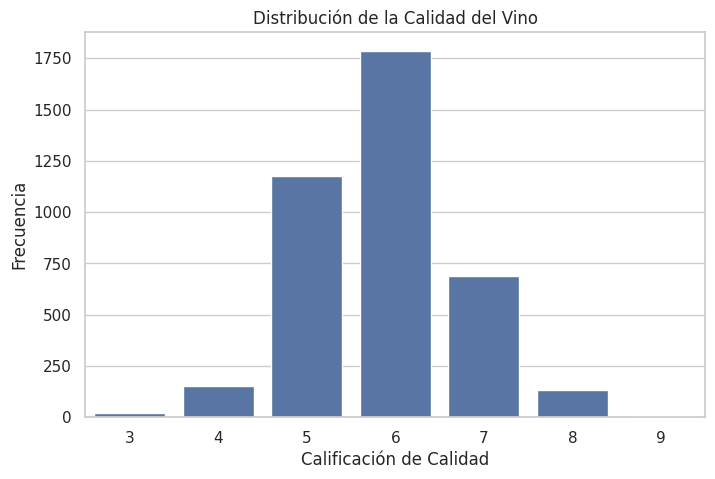

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set_theme(style="whitegrid")

# Histograma de la variable quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calificación de Calidad')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra que las calificaciones se concentran principalmente en los valores 5, 6 y 7. Existen muy pocos registros de vinos con calidad excelente (niguno visualmente en la gráfica) (9) o muy baja (3). Esto indica que el dataset tiene una distribución cercana a la normal, pero está desbalanceado hacia las calidades intermedias, lo que significa que el modelo tendrá más ejemplos de vinos "promedio" para aprender.

#### Análisis de Correlación
Para finalizar el Exploratory Analisis Data, analizaremos cómo se relacionan las variables entre sí. El coeficiente de correlación nos permite identificar qué componentes químicos tienen mayor influencia sobre la calidad del vino y detectar si hay variables muy relacionadas entre sí

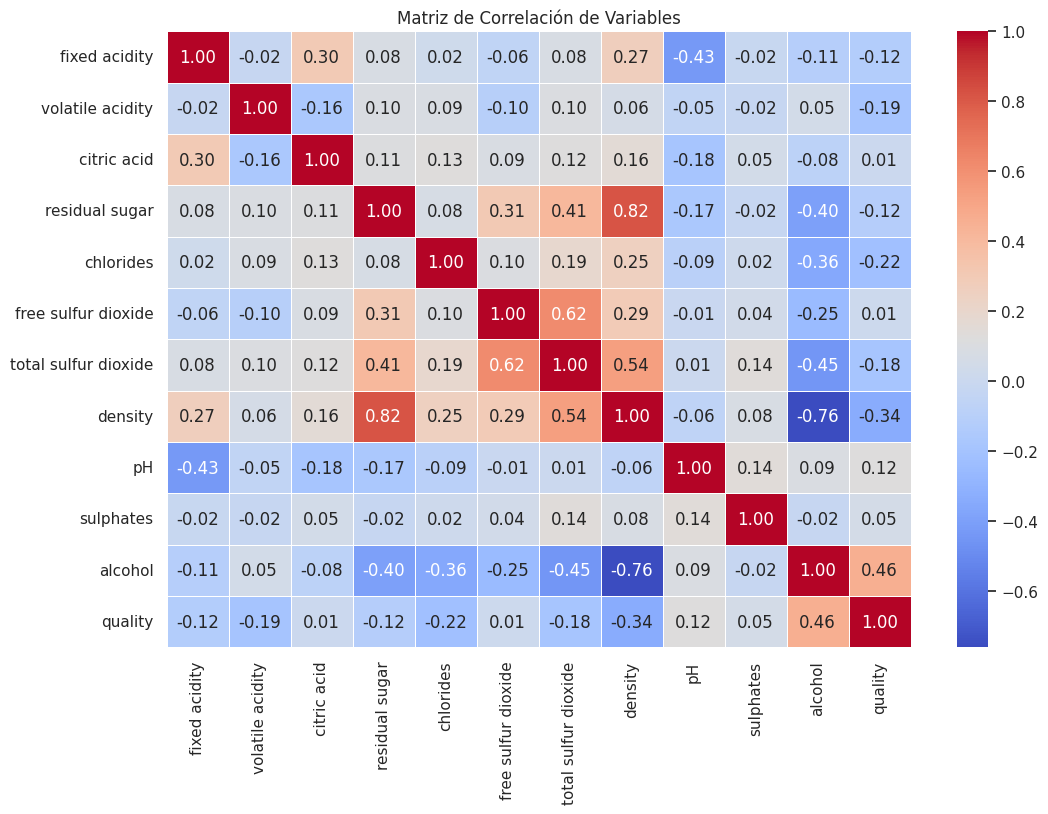

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculo de la matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

# Generación del mapa de calor (Heatmap)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

Se observa que el alcohol es el factor con mayor impacto positivo en la calidad ($0.46$), mientras que la densidad muestra la relación negativa más fuerte ($-0.34$), sugiriendo que vinos menos densos tienden a ser mejor valorados. Además, la altísima correlación entre densidad y azúcar residual ($0.82$) indica una redundancia de información que justifica plenamente el uso de PCA para simplificar el modelo sin perder datos clave.

## 2. Principal Component Analysis (PCA)

### Estandarización de Datos (Data Standardisation)

Antes de aplicar PCA, es evidente que es necesario estandarizar las variables para que cada una tenga una media de cero y una desviación estándar de uno. El PCA busca maximizar la varianza, si no se estandariza las variables con mayores escalar dominaran sobre las que tienen escalada pequeñas (como total sulfur dioxide sobre la variable density).

Se separa también la variable objetivo de las predictivas.


In [14]:
from sklearn.preprocessing import StandardScaler

# Separamos las variables predictoras (X) de la etiqueta (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Aplicamos el escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos de vuelta a DataFrame para verificar
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Media después de estandarizar:", X_scaled_df.mean().mean()) # Debería ser cercano a 0
print("Desviación estándar después de estandarizar:", X_scaled_df.std().mean()) # Debería ser 1

Media después de estandarizar: 1.1356681305990997e-15
Desviación estándar después de estandarizar: 1.0001262546561416


Los resultados confirman que el escalamiento fue exitoso, ya que la media es prácticamente cero ($1.13 \times 10^{-15}$) y la desviación estándar es uno. Esto garantiza que todas las variables tengan el mismo peso estadístico, eliminando sesgos por diferencias de escala antes de aplicar PCA.

### Matriz de Covarianza (Covariance Matrix)
Calcularemos la matriz de covarianza utilizando los datos estandarizados. Esta matriz es fundamental porque captura cómo varían las variables de forma conjunta; al estar los datos escalados, la diagonal principal será igual a 1 y los demás valores indicarán la fuerza de la relación lineal entre las características del vino.

In [17]:
import numpy as np

# Calculamos la matriz de covarianza
# Se usa .T (transpuesta) porque la función espera las variables en las filas
cov_matrix = np.cov(X_scaled.T)

# Matriz resultante
print(cov_matrix)

[[ 1.00025253 -0.01921855  0.29903402  0.08364115  0.02404195 -0.05841094
   0.08244589  0.26615812 -0.43138328 -0.01745692 -0.11081579]
 [-0.01921855  1.00025253 -0.16326895  0.09836449  0.08630855 -0.10249669
   0.10234097  0.06061876 -0.04696537 -0.02115574  0.04682674]
 [ 0.29903402 -0.16326895  1.00025253  0.10629597  0.13262347  0.09170444
   0.12287571  0.1601168  -0.18306096  0.04945466 -0.07653295]
 [ 0.08364115  0.09836449  0.10629597  1.00025253  0.07611034  0.30691273
   0.40968675  0.82070551 -0.16603908 -0.02050803 -0.39826751]
 [ 0.02404195  0.08630855  0.13262347  0.07611034  1.00025253  0.10129801
   0.19119331  0.2531515  -0.09059561  0.0178752  -0.35701791]
 [-0.05841094 -0.10249669  0.09170444  0.30691273  0.10129801  1.00025253
   0.61959357  0.29471242 -0.00775159  0.03794131 -0.25183199]
 [ 0.08244589  0.10234097  0.12287571  0.40968675  0.19119331  0.61959357
   1.00025253  0.53700371  0.00824144  0.13657809 -0.4467554 ]
 [ 0.26615812  0.06061876  0.1601168   0.

La diagonal con valores de 1.0 demuestra que los datos están bien escalados, mientras que existen algunos valores revelan que hay variables muy relacionadas entre sí (por ejemplo este valor 0.82070551). Si el valor es muy cercano a 1 o -1 significa que dos variables estan muy relacionadas. Esto confirma que el dataset es ideal para aplicar PCA y eliminar información redundante.

### Eigenvalores y Eigenvectores
Para hacer el PCA, necesitamos calcular los eigenvalores y los eigenvectores de la matriz de covarianza. Los eigenvectores nos dicen hacia qué dirección se van a acomodar los nuevos ejes (los Componentes Principales), y los eigenvalores nos dicen qué tanta información o variación tiene cada uno de esos ejes.

In [18]:
# Cálculo de valores y vectores propios de la matriz de covarianza
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Ordenamos de mayor a menor para que los componentes más importantes vayan primero
indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[indices]
eigen_vectors = eigen_vectors[:, indices]

print("Valores Propios (Eigenvalues):")
print(eigen_values)

Valores Propios (Eigenvalues):
[3.18434018 1.59686915 1.2133527  1.0393098  0.98137855 0.92953424
 0.72222941 0.60219216 0.42894246 0.28097644 0.02365268]


Los valores más altos al principio de la lista indican que los primeros componentes contienen la mayor parte de la información del vino. Geométricamente, los eigenvectores han "rotado" los datos originales para alinearlos con las direcciones donde hay más variabilidad.

#### Matriz de Transformación
Este se construye organizando los eigenvectores en columnas, tomando en cuenta el orden de sus eigenvalores (de mayor a menor importancia).

Cada valor en la matriz indica cuánto peso tiene una variable original en cada nuevo componente.

En otras palabras multiplicamos los datos ya normalizados por esa matriz, lo que básicamente “rota” los datos hacia una nueva perspectiva donde la variación se entiende mejor.

El resultado de esa multiplicación son los Componentes Principales (PC1, PC2, etc.), donde PC1 es la dirección en la que los datos varían más, PC2 la segunda más importante, y así sucesivamente. El resultado es un nuevo conjunto de datos donde las variables (PC1, PC2, etc.) son lineales y no están correlacionadas entre sí.

In [21]:
from sklearn.decomposition import PCA

# Creamos y entrenamos el objeto PCA con los datos escalados
pca = PCA()
pca.fit(X_scaled)

# Construimos la matriz de transformación
# Usamos .T porque sklearn entrega los vectores como filas, y los queremos como columnas
transformation_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(X.columns))],
    index=X.columns
)

# Mostramos la matriz resultante
display(transformation_matrix)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.152835,0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920,0.370509,-0.136228,-0.179780
volatile acidity,0.026771,-0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064,-0.179983,-0.233361,-0.019625
citric acid,0.151911,0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173,-0.261001,-0.050317,-0.010951
residual sugar,0.422095,-0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158,0.358607,0.072347,-0.486911
chlorides,0.211968,0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997,0.417670,0.052923,-0.026149
free sulfur dioxide,0.308153,-0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128,0.125295,-0.575552,0.031692
total sulfur dioxide,0.416806,-0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100,-0.110490,0.711630,-0.032872
density,0.512038,-0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298,0.079800,-0.074948,0.755219
pH,-0.114020,-0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391,0.269723,-0.123225,-0.146379
sulphates,0.047439,-0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051,-0.009803,-0.070471,-0.043031


Esta tabla muestra cuánto peso tiene cada variable original en los nuevos ejes del modelo. El PC1 se define principalmente por el azúcar, la densidad y el alcohol, mientras que el PC2 captura la acidez del vino; así, la matriz transforma 11 datos complejos en componentes más simples que resumen la estructura del dataset.

#### Varianza Explicada
Para determinar la eficiencia del PCA, calculamos el porcentaje de varianza (información) que captura cada componente individualmente y de forma acumulada. Este análisis es vital para decidir cuántas dimensiones podemos eliminar sin perder la esencia del dataset original. Presentaremos los resultados numéricos y un gráfico de sedimentación (Scree Plot) para facilitar la interpretación.

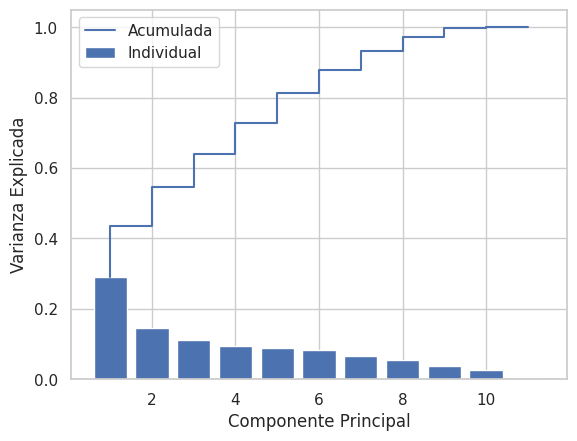

PC1: Individual = 28.94%, Acumulada = 28.94%
PC2: Individual = 14.51%, Acumulada = 43.45%
PC3: Individual = 11.03%, Acumulada = 54.48%
PC4: Individual = 9.45%, Acumulada = 63.93%
PC5: Individual = 8.92%, Acumulada = 72.85%
PC6: Individual = 8.45%, Acumulada = 81.30%
PC7: Individual = 6.56%, Acumulada = 87.86%
PC8: Individual = 5.47%, Acumulada = 93.33%
PC9: Individual = 3.90%, Acumulada = 97.23%
PC10: Individual = 2.55%, Acumulada = 99.79%
PC11: Individual = 0.21%, Acumulada = 100.00%


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Cálculo de varianza
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Gráfico de Varianza
plt.bar(range(1, len(exp_var_pca) + 1), exp_var_pca, label='Individual')
plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, label='Acumulada')
plt.ylabel('Varianza Explicada')
plt.xlabel('Componente Principal')
plt.legend()
plt.show()

# Resumen numérico
for i, (var, cum) in enumerate(zip(exp_var_pca, cum_sum_eigenvalues)):
    print(f"PC{i+1}: Individual = {var:.2%}, Acumulada = {cum:.2%}")

Los dos primeros componentes capturan el 43.45% de la información, mientras que con los primeros siete se logra retener casi el 88% de la varianza total del dataset. Esto demuestra que es posible reducir significativamente la cantidad de variables manteniendo la mayor parte de la esencia y estructura de los datos originales.

#### Visualización de los Primeros Tres Componentes Principales
En esta sección, derivamos las coordenadas de los datos para los primeros tres componentes (PC1, PC2 y PC3). Al graficarlos en un espacio 3D, podemos observar cómo se agrupan los vinos y si existe alguna estructura clara basada en sus características químicas más influyentes.

In [32]:
import plotly.express as px
import pandas as pd

# Transformar datos
pca_data = pca.transform(X_scaled)

# Crear DataFrame con solo 3 componentes
df = pd.DataFrame(pca_data[:, :3], columns=['PC1', 'PC2', 'PC3'])
df['Quality'] = y

# Gráfica 3D simple
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                    color='Quality')

fig.show()


La visualización en 3D muestra que los vinos forman una nube compacta y continua sin grupos separados, lo que indica que la calidad no se define por una diferencia drástica en estas tres dimensiones. No obstante, la forma alargada de la dispersión confirma que los primeros componentes logran capturar la estructura principal de la variabilidad química del dataset.

#### Visualización de los Primeros Dos Componentes Principales
En esta etapa, proyectamos los datos únicamente en el PC1 y PC2, que son los ejes que concentran la mayor cantidad de información (43.45% según nuestro análisis previo). Al reducir la visualización a dos dimensiones, es mucho más sencillo identificar patrones, tendencias o posibles agrupamientos en los datos de los vinos.

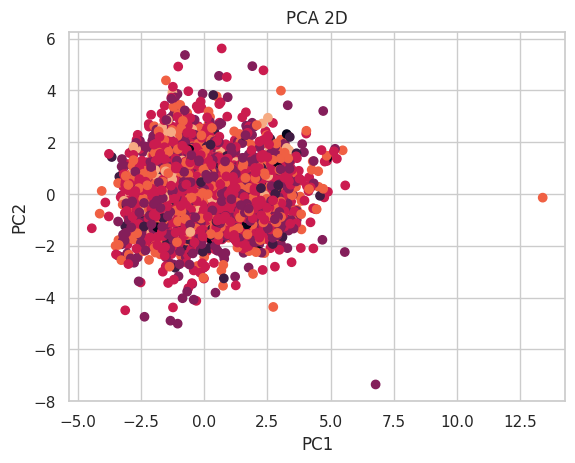

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con los primeros 2 componentes
df = pd.DataFrame(pca_data[:, :2], columns=['PC1', 'PC2'])
df['Quality'] = y

# Gráfica 2D simple
plt.scatter(df['PC1'], df['PC2'], c=df['Quality'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D")
plt.show()


El gráfico muestra que los vinos de diferentes calidades se traslapan en una sola nube densa, lo que indica que no hay una separación química obvia que defina la calidad en solo dos dimensiones. Sin embargo, la dispersión alargada confirma que el PC1 captura la mayor variabilidad del dataset, sirviendo como el eje principal para resumir las características del vino.

## Conclusiones


En este trabajo, el PCA demostró ser efectivo para el dataset de calidad de vino blanco, ya que permitió reducir las 11 variables originales a un menor número de componentes principales manteniendo la mayor parte de la información (alrededor del 90% de la varianza con 7 componentes). Esto confirma que existía redundancia entre las variables físico-químicas y que era posible resumir los datos sin perder información importante.

A partir de la reducción de dimensionalidad, se observó que las distintas calidades de vino no forman grupos completamente separados, sino que presentan bastante solapamiento. Esto indica que la calidad no depende de un solo factor dominante, sino de combinaciones más complejas entre las variables. PCA ayudó a eliminar multicolinealidad y a visualizar mejor la estructura general de los datos, aunque no hizo que las clases fueran perfectamente separables. Esto talvez se pudo haber logrado agrupando aún más las clasificaciones. Es decir, en vez de una escala del 0 al 10, dividirla en 3 (malo, decente, excelente).

Finalmente, el espacio reducido es adecuado para arquitecturas de modelos neuronales, tanto para clasificación como para regresión. Al trabajar con menos variables, el entrenamiento es más rápido y el modelo tiene menor riesgo de sobreajuste. Sin embargo, de nuevo, dado que las clases no están claramente separadas, será necesario utilizar modelos con suficiente capacidad para capturar relaciones no lineales en los datos.

Liga a repositorio de github: https://github.com/interminableDgo/02-Principal-Component-Analysis

## Referencias



Scikit-learn developers. (s.f.). Decomposition: Principal component analysis (PCA). Scikit-learn. Recuperado el 16 de febrero de 2026, de https://scikit-learn.org/stable/modules/decomposition.html#pca


Plotly Technologies Inc. (s.f.). 3D scatter plots in Python. Plotly. Recuperado el 16 de febrero de 2026, de https://plotly.com/python/3d-scatter-plots/
